In [8]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [3]:
### RUN EXP
def run_batch_exp(ns,args):
  dataL = []
  for i in range(ns):
    task = Task()
    sem = SEM(args['sch'])
    exp,curr  = task.generate_experiment(**args['exp'])
    data = sem.run_exp(exp)
    data['exp']=exp
    dataL.append(data)
  return dataL

In [4]:
### analyze data

def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [trial,layer2/3,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = softmax(xth[:,l,ns],-1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

In [5]:
alfaL = np.arange(1,2.1,0.05)
betaL = np.arange(0.01,0.2,0.005)
lmdaL = np.arange(0.3,0.5,0.05)

expargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
ns = 15

L = []
for alfa,beta,lmda in product(alfaL,betaL,lmdaL):
  params = alfa,beta,lmda
  print(alfa,beta,lmda)
  schargs = {
    'concentration':alfa,
    'stickiness':beta,
    'sparsity':lmda
  }
  args = {
    'sch':schargs,
    'exp':expargs
  }
  dataL = run_batch_exp(ns,args)
  acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
  acc = acc.mean(1) # mean over layers
  mB = acc.mean(0)
  mse = np.mean((mB - hB)**2)
  ## record
  D = {**schargs,'mse':mse}
  L.append(D)


1.0 0.01 0.3
1.0 0.01 0.35
1.0 0.01 0.39999999999999997
1.0 0.01 0.44999999999999996
1.0 0.015 0.3
1.0 0.015 0.35
1.0 0.015 0.39999999999999997
1.0 0.015 0.44999999999999996
1.0 0.019999999999999997 0.3
1.0 0.019999999999999997 0.35
1.0 0.019999999999999997 0.39999999999999997
1.0 0.019999999999999997 0.44999999999999996
1.0 0.024999999999999998 0.3
1.0 0.024999999999999998 0.35
1.0 0.024999999999999998 0.39999999999999997
1.0 0.024999999999999998 0.44999999999999996
1.0 0.03 0.3
1.0 0.03 0.35
1.0 0.03 0.39999999999999997
1.0 0.03 0.44999999999999996
1.0 0.034999999999999996 0.3
1.0 0.034999999999999996 0.35
1.0 0.034999999999999996 0.39999999999999997
1.0 0.034999999999999996 0.44999999999999996
1.0 0.039999999999999994 0.3
1.0 0.039999999999999994 0.35
1.0 0.039999999999999994 0.39999999999999997
1.0 0.039999999999999994 0.44999999999999996
1.0 0.045 0.3
1.0 0.045 0.35
1.0 0.045 0.39999999999999997
1.0 0.045 0.44999999999999996
1.0 0.049999999999999996 0.3
1.0 0.049999999999999996 0.

1.05 0.12499999999999997 0.3
1.05 0.12499999999999997 0.35
1.05 0.12499999999999997 0.39999999999999997
1.05 0.12499999999999997 0.44999999999999996
1.05 0.12999999999999998 0.3
1.05 0.12999999999999998 0.35
1.05 0.12999999999999998 0.39999999999999997
1.05 0.12999999999999998 0.44999999999999996
1.05 0.13499999999999998 0.3
1.05 0.13499999999999998 0.35
1.05 0.13499999999999998 0.39999999999999997
1.05 0.13499999999999998 0.44999999999999996
1.05 0.13999999999999999 0.3
1.05 0.13999999999999999 0.35
1.05 0.13999999999999999 0.39999999999999997
1.05 0.13999999999999999 0.44999999999999996
1.05 0.145 0.3
1.05 0.145 0.35
1.05 0.145 0.39999999999999997
1.05 0.145 0.44999999999999996
1.05 0.15 0.3
1.05 0.15 0.35
1.05 0.15 0.39999999999999997
1.05 0.15 0.44999999999999996
1.05 0.155 0.3
1.05 0.155 0.35
1.05 0.155 0.39999999999999997
1.05 0.155 0.44999999999999996
1.05 0.15999999999999998 0.3
1.05 0.15999999999999998 0.35
1.05 0.15999999999999998 0.39999999999999997
1.05 0.15999999999999998 

1.1500000000000001 0.045 0.3
1.1500000000000001 0.045 0.35
1.1500000000000001 0.045 0.39999999999999997
1.1500000000000001 0.045 0.44999999999999996
1.1500000000000001 0.049999999999999996 0.3
1.1500000000000001 0.049999999999999996 0.35
1.1500000000000001 0.049999999999999996 0.39999999999999997
1.1500000000000001 0.049999999999999996 0.44999999999999996
1.1500000000000001 0.05499999999999999 0.3
1.1500000000000001 0.05499999999999999 0.35
1.1500000000000001 0.05499999999999999 0.39999999999999997
1.1500000000000001 0.05499999999999999 0.44999999999999996
1.1500000000000001 0.05999999999999999 0.3
1.1500000000000001 0.05999999999999999 0.35
1.1500000000000001 0.05999999999999999 0.39999999999999997
1.1500000000000001 0.05999999999999999 0.44999999999999996
1.1500000000000001 0.06499999999999999 0.3
1.1500000000000001 0.06499999999999999 0.35
1.1500000000000001 0.06499999999999999 0.39999999999999997
1.1500000000000001 0.06499999999999999 0.44999999999999996
1.1500000000000001 0.069999

1.2000000000000002 0.06499999999999999 0.44999999999999996
1.2000000000000002 0.06999999999999999 0.3
1.2000000000000002 0.06999999999999999 0.35
1.2000000000000002 0.06999999999999999 0.39999999999999997
1.2000000000000002 0.06999999999999999 0.44999999999999996
1.2000000000000002 0.07499999999999998 0.3
1.2000000000000002 0.07499999999999998 0.35
1.2000000000000002 0.07499999999999998 0.39999999999999997
1.2000000000000002 0.07499999999999998 0.44999999999999996
1.2000000000000002 0.07999999999999999 0.3
1.2000000000000002 0.07999999999999999 0.35
1.2000000000000002 0.07999999999999999 0.39999999999999997
1.2000000000000002 0.07999999999999999 0.44999999999999996
1.2000000000000002 0.08499999999999998 0.3
1.2000000000000002 0.08499999999999998 0.35
1.2000000000000002 0.08499999999999998 0.39999999999999997
1.2000000000000002 0.08499999999999998 0.44999999999999996
1.2000000000000002 0.08999999999999998 0.3
1.2000000000000002 0.08999999999999998 0.35
1.2000000000000002 0.0899999999999

1.2500000000000002 0.08999999999999998 0.35
1.2500000000000002 0.08999999999999998 0.39999999999999997
1.2500000000000002 0.08999999999999998 0.44999999999999996
1.2500000000000002 0.09499999999999999 0.3
1.2500000000000002 0.09499999999999999 0.35
1.2500000000000002 0.09499999999999999 0.39999999999999997
1.2500000000000002 0.09499999999999999 0.44999999999999996
1.2500000000000002 0.09999999999999998 0.3
1.2500000000000002 0.09999999999999998 0.35
1.2500000000000002 0.09999999999999998 0.39999999999999997
1.2500000000000002 0.09999999999999998 0.44999999999999996
1.2500000000000002 0.10499999999999998 0.3
1.2500000000000002 0.10499999999999998 0.35
1.2500000000000002 0.10499999999999998 0.39999999999999997
1.2500000000000002 0.10499999999999998 0.44999999999999996
1.2500000000000002 0.10999999999999997 0.3
1.2500000000000002 0.10999999999999997 0.35
1.2500000000000002 0.10999999999999997 0.39999999999999997
1.2500000000000002 0.10999999999999997 0.44999999999999996
1.2500000000000002

1.3000000000000003 0.10999999999999997 0.44999999999999996
1.3000000000000003 0.11499999999999998 0.3
1.3000000000000003 0.11499999999999998 0.35
1.3000000000000003 0.11499999999999998 0.39999999999999997
1.3000000000000003 0.11499999999999998 0.44999999999999996
1.3000000000000003 0.11999999999999998 0.3
1.3000000000000003 0.11999999999999998 0.35
1.3000000000000003 0.11999999999999998 0.39999999999999997
1.3000000000000003 0.11999999999999998 0.44999999999999996
1.3000000000000003 0.12499999999999997 0.3
1.3000000000000003 0.12499999999999997 0.35
1.3000000000000003 0.12499999999999997 0.39999999999999997
1.3000000000000003 0.12499999999999997 0.44999999999999996
1.3000000000000003 0.12999999999999998 0.3
1.3000000000000003 0.12999999999999998 0.35
1.3000000000000003 0.12999999999999998 0.39999999999999997
1.3000000000000003 0.12999999999999998 0.44999999999999996
1.3000000000000003 0.13499999999999998 0.3
1.3000000000000003 0.13499999999999998 0.35
1.3000000000000003 0.1349999999999

1.3500000000000003 0.13499999999999998 0.35
1.3500000000000003 0.13499999999999998 0.39999999999999997
1.3500000000000003 0.13499999999999998 0.44999999999999996
1.3500000000000003 0.13999999999999999 0.3
1.3500000000000003 0.13999999999999999 0.35
1.3500000000000003 0.13999999999999999 0.39999999999999997
1.3500000000000003 0.13999999999999999 0.44999999999999996
1.3500000000000003 0.145 0.3
1.3500000000000003 0.145 0.35
1.3500000000000003 0.145 0.39999999999999997
1.3500000000000003 0.145 0.44999999999999996
1.3500000000000003 0.15 0.3
1.3500000000000003 0.15 0.35
1.3500000000000003 0.15 0.39999999999999997
1.3500000000000003 0.15 0.44999999999999996
1.3500000000000003 0.155 0.3
1.3500000000000003 0.155 0.35
1.3500000000000003 0.155 0.39999999999999997
1.3500000000000003 0.155 0.44999999999999996
1.3500000000000003 0.15999999999999998 0.3
1.3500000000000003 0.15999999999999998 0.35
1.3500000000000003 0.15999999999999998 0.39999999999999997
1.3500000000000003 0.15999999999999998 0.449

1.4000000000000004 0.15999999999999998 0.44999999999999996
1.4000000000000004 0.16499999999999998 0.3
1.4000000000000004 0.16499999999999998 0.35
1.4000000000000004 0.16499999999999998 0.39999999999999997
1.4000000000000004 0.16499999999999998 0.44999999999999996
1.4000000000000004 0.16999999999999998 0.3
1.4000000000000004 0.16999999999999998 0.35
1.4000000000000004 0.16999999999999998 0.39999999999999997
1.4000000000000004 0.16999999999999998 0.44999999999999996
1.4000000000000004 0.175 0.3
1.4000000000000004 0.175 0.35
1.4000000000000004 0.175 0.39999999999999997
1.4000000000000004 0.175 0.44999999999999996
1.4000000000000004 0.18 0.3
1.4000000000000004 0.18 0.35
1.4000000000000004 0.18 0.39999999999999997
1.4000000000000004 0.18 0.44999999999999996
1.4000000000000004 0.18499999999999997 0.3
1.4000000000000004 0.18499999999999997 0.35
1.4000000000000004 0.18499999999999997 0.39999999999999997
1.4000000000000004 0.18499999999999997 0.44999999999999996
1.4000000000000004 0.18999999999

1.4500000000000004 0.18499999999999997 0.44999999999999996
1.4500000000000004 0.18999999999999997 0.3
1.4500000000000004 0.18999999999999997 0.35
1.4500000000000004 0.18999999999999997 0.39999999999999997
1.4500000000000004 0.18999999999999997 0.44999999999999996
1.4500000000000004 0.19499999999999998 0.3
1.4500000000000004 0.19499999999999998 0.35
1.4500000000000004 0.19499999999999998 0.39999999999999997
1.4500000000000004 0.19499999999999998 0.44999999999999996
1.5000000000000004 0.01 0.3
1.5000000000000004 0.01 0.35
1.5000000000000004 0.01 0.39999999999999997
1.5000000000000004 0.01 0.44999999999999996
1.5000000000000004 0.015 0.3
1.5000000000000004 0.015 0.35
1.5000000000000004 0.015 0.39999999999999997
1.5000000000000004 0.015 0.44999999999999996
1.5000000000000004 0.019999999999999997 0.3
1.5000000000000004 0.019999999999999997 0.35
1.5000000000000004 0.019999999999999997 0.39999999999999997
1.5000000000000004 0.019999999999999997 0.44999999999999996
1.5000000000000004 0.0249999

1.5500000000000005 0.019999999999999997 0.44999999999999996
1.5500000000000005 0.024999999999999998 0.3
1.5500000000000005 0.024999999999999998 0.35
1.5500000000000005 0.024999999999999998 0.39999999999999997
1.5500000000000005 0.024999999999999998 0.44999999999999996
1.5500000000000005 0.03 0.3
1.5500000000000005 0.03 0.35
1.5500000000000005 0.03 0.39999999999999997
1.5500000000000005 0.03 0.44999999999999996
1.5500000000000005 0.034999999999999996 0.3
1.5500000000000005 0.034999999999999996 0.35
1.5500000000000005 0.034999999999999996 0.39999999999999997
1.5500000000000005 0.034999999999999996 0.44999999999999996
1.5500000000000005 0.039999999999999994 0.3
1.5500000000000005 0.039999999999999994 0.35
1.5500000000000005 0.039999999999999994 0.39999999999999997
1.5500000000000005 0.039999999999999994 0.44999999999999996
1.5500000000000005 0.045 0.3
1.5500000000000005 0.045 0.35
1.5500000000000005 0.045 0.39999999999999997
1.5500000000000005 0.045 0.44999999999999996
1.5500000000000005 

1.6000000000000005 0.045 0.44999999999999996
1.6000000000000005 0.049999999999999996 0.3
1.6000000000000005 0.049999999999999996 0.35
1.6000000000000005 0.049999999999999996 0.39999999999999997
1.6000000000000005 0.049999999999999996 0.44999999999999996
1.6000000000000005 0.05499999999999999 0.3
1.6000000000000005 0.05499999999999999 0.35
1.6000000000000005 0.05499999999999999 0.39999999999999997
1.6000000000000005 0.05499999999999999 0.44999999999999996
1.6000000000000005 0.05999999999999999 0.3
1.6000000000000005 0.05999999999999999 0.35
1.6000000000000005 0.05999999999999999 0.39999999999999997
1.6000000000000005 0.05999999999999999 0.44999999999999996
1.6000000000000005 0.06499999999999999 0.3
1.6000000000000005 0.06499999999999999 0.35
1.6000000000000005 0.06499999999999999 0.39999999999999997
1.6000000000000005 0.06499999999999999 0.44999999999999996
1.6000000000000005 0.06999999999999999 0.3
1.6000000000000005 0.06999999999999999 0.35
1.6000000000000005 0.06999999999999999 0.399

1.6500000000000006 0.06999999999999999 0.35
1.6500000000000006 0.06999999999999999 0.39999999999999997
1.6500000000000006 0.06999999999999999 0.44999999999999996
1.6500000000000006 0.07499999999999998 0.3
1.6500000000000006 0.07499999999999998 0.35
1.6500000000000006 0.07499999999999998 0.39999999999999997
1.6500000000000006 0.07499999999999998 0.44999999999999996
1.6500000000000006 0.07999999999999999 0.3
1.6500000000000006 0.07999999999999999 0.35
1.6500000000000006 0.07999999999999999 0.39999999999999997
1.6500000000000006 0.07999999999999999 0.44999999999999996
1.6500000000000006 0.08499999999999998 0.3
1.6500000000000006 0.08499999999999998 0.35
1.6500000000000006 0.08499999999999998 0.39999999999999997
1.6500000000000006 0.08499999999999998 0.44999999999999996
1.6500000000000006 0.08999999999999998 0.3
1.6500000000000006 0.08999999999999998 0.35
1.6500000000000006 0.08999999999999998 0.39999999999999997
1.6500000000000006 0.08999999999999998 0.44999999999999996
1.6500000000000006

1.7000000000000006 0.08999999999999998 0.44999999999999996
1.7000000000000006 0.09499999999999999 0.3
1.7000000000000006 0.09499999999999999 0.35
1.7000000000000006 0.09499999999999999 0.39999999999999997
1.7000000000000006 0.09499999999999999 0.44999999999999996
1.7000000000000006 0.09999999999999998 0.3
1.7000000000000006 0.09999999999999998 0.35
1.7000000000000006 0.09999999999999998 0.39999999999999997
1.7000000000000006 0.09999999999999998 0.44999999999999996
1.7000000000000006 0.10499999999999998 0.3
1.7000000000000006 0.10499999999999998 0.35
1.7000000000000006 0.10499999999999998 0.39999999999999997
1.7000000000000006 0.10499999999999998 0.44999999999999996
1.7000000000000006 0.10999999999999997 0.3
1.7000000000000006 0.10999999999999997 0.35
1.7000000000000006 0.10999999999999997 0.39999999999999997
1.7000000000000006 0.10999999999999997 0.44999999999999996
1.7000000000000006 0.11499999999999998 0.3
1.7000000000000006 0.11499999999999998 0.35
1.7000000000000006 0.1149999999999

1.7500000000000007 0.11499999999999998 0.35
1.7500000000000007 0.11499999999999998 0.39999999999999997
1.7500000000000007 0.11499999999999998 0.44999999999999996
1.7500000000000007 0.11999999999999998 0.3
1.7500000000000007 0.11999999999999998 0.35
1.7500000000000007 0.11999999999999998 0.39999999999999997
1.7500000000000007 0.11999999999999998 0.44999999999999996
1.7500000000000007 0.12499999999999997 0.3
1.7500000000000007 0.12499999999999997 0.35
1.7500000000000007 0.12499999999999997 0.39999999999999997
1.7500000000000007 0.12499999999999997 0.44999999999999996
1.7500000000000007 0.12999999999999998 0.3
1.7500000000000007 0.12999999999999998 0.35
1.7500000000000007 0.12999999999999998 0.39999999999999997
1.7500000000000007 0.12999999999999998 0.44999999999999996
1.7500000000000007 0.13499999999999998 0.3
1.7500000000000007 0.13499999999999998 0.35
1.7500000000000007 0.13499999999999998 0.39999999999999997
1.7500000000000007 0.13499999999999998 0.44999999999999996
1.7500000000000007

1.8000000000000007 0.13499999999999998 0.44999999999999996
1.8000000000000007 0.13999999999999999 0.3
1.8000000000000007 0.13999999999999999 0.35
1.8000000000000007 0.13999999999999999 0.39999999999999997
1.8000000000000007 0.13999999999999999 0.44999999999999996
1.8000000000000007 0.145 0.3
1.8000000000000007 0.145 0.35
1.8000000000000007 0.145 0.39999999999999997
1.8000000000000007 0.145 0.44999999999999996
1.8000000000000007 0.15 0.3
1.8000000000000007 0.15 0.35
1.8000000000000007 0.15 0.39999999999999997
1.8000000000000007 0.15 0.44999999999999996
1.8000000000000007 0.155 0.3
1.8000000000000007 0.155 0.35
1.8000000000000007 0.155 0.39999999999999997
1.8000000000000007 0.155 0.44999999999999996
1.8000000000000007 0.15999999999999998 0.3
1.8000000000000007 0.15999999999999998 0.35
1.8000000000000007 0.15999999999999998 0.39999999999999997
1.8000000000000007 0.15999999999999998 0.44999999999999996
1.8000000000000007 0.16499999999999998 0.3
1.8000000000000007 0.16499999999999998 0.35
1

1.8500000000000008 0.16499999999999998 0.3
1.8500000000000008 0.16499999999999998 0.35
1.8500000000000008 0.16499999999999998 0.39999999999999997
1.8500000000000008 0.16499999999999998 0.44999999999999996
1.8500000000000008 0.16999999999999998 0.3
1.8500000000000008 0.16999999999999998 0.35
1.8500000000000008 0.16999999999999998 0.39999999999999997
1.8500000000000008 0.16999999999999998 0.44999999999999996
1.8500000000000008 0.175 0.3
1.8500000000000008 0.175 0.35
1.8500000000000008 0.175 0.39999999999999997
1.8500000000000008 0.175 0.44999999999999996
1.8500000000000008 0.18 0.3
1.8500000000000008 0.18 0.35
1.8500000000000008 0.18 0.39999999999999997
1.8500000000000008 0.18 0.44999999999999996
1.8500000000000008 0.18499999999999997 0.3
1.8500000000000008 0.18499999999999997 0.35
1.8500000000000008 0.18499999999999997 0.39999999999999997
1.8500000000000008 0.18499999999999997 0.44999999999999996
1.8500000000000008 0.18999999999999997 0.3
1.8500000000000008 0.18999999999999997 0.35
1.85

1.9000000000000008 0.18999999999999997 0.3
1.9000000000000008 0.18999999999999997 0.35
1.9000000000000008 0.18999999999999997 0.39999999999999997
1.9000000000000008 0.18999999999999997 0.44999999999999996
1.9000000000000008 0.19499999999999998 0.3
1.9000000000000008 0.19499999999999998 0.35
1.9000000000000008 0.19499999999999998 0.39999999999999997
1.9000000000000008 0.19499999999999998 0.44999999999999996
1.9500000000000008 0.01 0.3
1.9500000000000008 0.01 0.35
1.9500000000000008 0.01 0.39999999999999997
1.9500000000000008 0.01 0.44999999999999996
1.9500000000000008 0.015 0.3
1.9500000000000008 0.015 0.35
1.9500000000000008 0.015 0.39999999999999997
1.9500000000000008 0.015 0.44999999999999996
1.9500000000000008 0.019999999999999997 0.3
1.9500000000000008 0.019999999999999997 0.35
1.9500000000000008 0.019999999999999997 0.39999999999999997
1.9500000000000008 0.019999999999999997 0.44999999999999996
1.9500000000000008 0.024999999999999998 0.3
1.9500000000000008 0.024999999999999998 0.3

2.000000000000001 0.024999999999999998 0.35
2.000000000000001 0.024999999999999998 0.39999999999999997
2.000000000000001 0.024999999999999998 0.44999999999999996
2.000000000000001 0.03 0.3
2.000000000000001 0.03 0.35
2.000000000000001 0.03 0.39999999999999997
2.000000000000001 0.03 0.44999999999999996
2.000000000000001 0.034999999999999996 0.3
2.000000000000001 0.034999999999999996 0.35
2.000000000000001 0.034999999999999996 0.39999999999999997
2.000000000000001 0.034999999999999996 0.44999999999999996
2.000000000000001 0.039999999999999994 0.3
2.000000000000001 0.039999999999999994 0.35
2.000000000000001 0.039999999999999994 0.39999999999999997
2.000000000000001 0.039999999999999994 0.44999999999999996
2.000000000000001 0.045 0.3
2.000000000000001 0.045 0.35
2.000000000000001 0.045 0.39999999999999997
2.000000000000001 0.045 0.44999999999999996
2.000000000000001 0.049999999999999996 0.3
2.000000000000001 0.049999999999999996 0.35
2.000000000000001 0.049999999999999996 0.39999999999999

2.0500000000000007 0.05499999999999999 0.3
2.0500000000000007 0.05499999999999999 0.35
2.0500000000000007 0.05499999999999999 0.39999999999999997
2.0500000000000007 0.05499999999999999 0.44999999999999996
2.0500000000000007 0.05999999999999999 0.3
2.0500000000000007 0.05999999999999999 0.35
2.0500000000000007 0.05999999999999999 0.39999999999999997
2.0500000000000007 0.05999999999999999 0.44999999999999996
2.0500000000000007 0.06499999999999999 0.3
2.0500000000000007 0.06499999999999999 0.35
2.0500000000000007 0.06499999999999999 0.39999999999999997
2.0500000000000007 0.06499999999999999 0.44999999999999996
2.0500000000000007 0.06999999999999999 0.3
2.0500000000000007 0.06999999999999999 0.35
2.0500000000000007 0.06999999999999999 0.39999999999999997
2.0500000000000007 0.06999999999999999 0.44999999999999996
2.0500000000000007 0.07499999999999998 0.3
2.0500000000000007 0.07499999999999998 0.35
2.0500000000000007 0.07499999999999998 0.39999999999999997
2.0500000000000007 0.0749999999999

In [6]:
gsdf = pd.DataFrame(L)
gsdf = gsdf.sort_values('mse',ascending=True)

concentration    2.050000
stickiness       0.015000
sparsity         0.300000
mse              0.170542
Name: 3196, dtype: float64


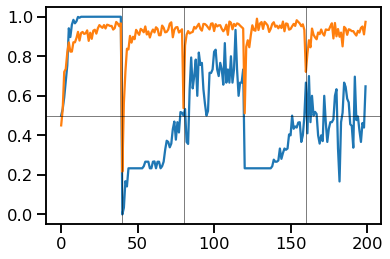

In [9]:
best_param = gsdf.iloc[0]
a,b,l,m = best_param
print(best_param)
schargs_prime = {
  'concentration':a,
  'stickiness':b,
  'sparsity':l
}
args = {
  'sch':schargs_prime,
  'exp':expargs
  }
dataL = run_batch_exp(ns,args)
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
acc = acc.mean(1) # mean over layers
mB = acc.mean(0)
## plot
plt.plot(mB)
plt.plot(hB)
plt.axhline(0.5,c='k',lw=0.5)
for v in [40,80,160]:
  plt.axvline(v,c='k',lw=0.5)
plt.savefig('figures/scratch/bestfitGS-%i'%time.perf_counter_ns())

In [12]:
gsdf.to_csv('data/gsdf%i'%time.perf_counter_ns())